# Import necessary libraries

In [1045]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [1046]:
from datetime import date

In [1047]:
#reading the dataset
housing=pd.read_csv('train.csv')


In [1048]:
#check head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1049]:
#check shape of data
housing.shape

(1460, 81)

## Handling Missing values

In [1050]:
#check for null values
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

There are columns that have high missing values.

Need to check percentage of missing values for better understanding

In [1051]:
missing_percentage = (housing.isnull().sum()/ len(housing))*100

In [1052]:
missing_percentage.sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [1053]:
#drop columns with high missing values  and Id
housing.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [1054]:
housing.shape

(1460, 75)

In [1055]:
missing_percentage = (housing.isnull().sum()/ len(housing))*100
missing_percentage[missing_percentage>0].sort_values(ascending=False)

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [1056]:
missing_count=housing.isnull().sum()
missing_count[missing_count>0].sort_values(ascending=False)

LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [1057]:
housing['GarageCond']=housing.GarageCond.fillna('No Garage')
housing['GarageQual']=housing.GarageQual.fillna('No Garage')
housing['GarageFinish']=housing.GarageFinish.fillna('No Garage')
housing['GarageType']=housing.GarageType.fillna('No Garage')
#housing['GarageYrBlt']=housing.GarageCond.fillna('No Garage')
housing['BsmtFinType1']=housing.BsmtFinType1.fillna('No Basement')
housing['BsmtFinType2']=housing.BsmtFinType2.fillna('No Basement')
housing['BsmtExposure']=housing.BsmtExposure.fillna('No Basement')
housing['BsmtCond']=housing.BsmtCond.fillna('No Basement')
housing['BsmtQual']=housing.BsmtQual.fillna('No Basement')

In [1058]:
missing_count=housing.isnull().sum()
missing_count[missing_count>0].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

Variable LotFrontAge has more than 17 % data missing. Imputing this variable could skew the data. So it's better to drop the column

In [1059]:
housing.drop('LotFrontage',axis=1,inplace=True)

In [1060]:
missing_count=housing.isnull().sum()
missing_count[missing_count>0].sort_values(ascending=False)

GarageYrBlt    81
MasVnrArea      8
MasVnrType      8
Electrical      1
dtype: int64

In [1061]:
#fill MasVnrType and Electrical with mode as they are categorical variable
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])

In [1062]:
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1063]:
#fill MasVnrArea wil median value
housing['MasVnrArea']=housing.MasVnrArea.fillna(housing.MasVnrArea.median()) 

In [1064]:
#check missing values
missing_count=housing.isnull().sum()
missing_count[missing_count>0].sort_values(ascending=False)

GarageYrBlt    81
dtype: int64

Missing values has been handled and there are no missing values now

In [1065]:
housing.shape

(1460, 74)

In [1066]:
housing.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1067]:
housing.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1068]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

# Data Preparation

In [1069]:
#converting years to number of years
# Converting years to age
housing['YearBuilt_Age'] = housing['YearBuilt'].max() - housing['YearBuilt']
housing['YearRemodAdd_Age'] = housing['YearRemodAdd'].max() - housing['YearRemodAdd']
housing['YrSold_Age'] = housing['YrSold'].max() - housing['YrSold']
housing['GarageYrBlt_Age'] = housing['GarageYrBlt'].max() - housing['GarageYrBlt']

In [1070]:
# Dropping columns
housing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [1071]:
#check newly created columns
housing[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0
5,17,15,1,17.0
6,6,5,3,6.0
7,37,37,1,37.0
8,79,60,2,79.0
9,71,60,2,71.0


In [1072]:
# checking null values
round(housing.isnull().sum()/len(housing.index),2)[round(housing.isnull().sum()/ len(housing.index),2).values>0.00]

GarageYrBlt_Age    0.06
dtype: float64

In [1073]:
#replacing missing values with median.
housing['GarageYrBlt_Age']=housing.GarageYrBlt_Age.fillna(housing.GarageYrBlt_Age.median()) 

In [1074]:
housing.shape

(1460, 74)

In [1075]:
housing.dtypes

MSSubClass            int64
MSZoning             object
LotArea               int64
Street               object
LotShape             object
LandContour          object
Utilities            object
LotConfig            object
LandSlope            object
Neighborhood         object
Condition1           object
Condition2           object
BldgType             object
HouseStyle           object
OverallQual           int64
OverallCond           int64
RoofStyle            object
RoofMatl             object
Exterior1st          object
Exterior2nd          object
MasVnrType           object
MasVnrArea          float64
ExterQual            object
ExterCond            object
Foundation           object
BsmtQual             object
BsmtCond             object
BsmtExposure         object
BsmtFinType1         object
BsmtFinSF1            int64
                     ...   
FullBath              int64
HalfBath              int64
BedroomAbvGr          int64
KitchenAbvGr          int64
KitchenQual         

In [1076]:
#select categorical variables
housing_categorical=housing.select_dtypes(include=['object'])

In [1077]:
#select ing numerical variables
num_vars=list(housing.select_dtypes(exclude=['object']).columns)

In [1078]:
#check head for categorical variables
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [1079]:
# create into dummy variables
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
#check head
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1080]:
#concatenate dummies
housing_final=pd.concat([housing, housing_dummies], axis=1)

In [1081]:
#drop columns from which dummies has been created
housing_final=housing_final.drop(list(housing_categorical.columns), axis=1)

In [1082]:
#check shape
housing_final.shape

(1460, 241)

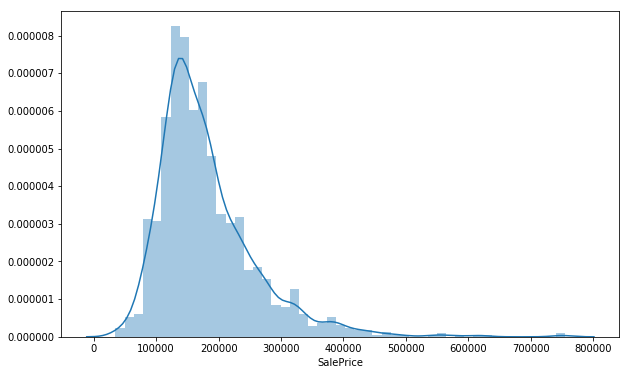

In [1083]:
#checking the sales price data
plt.figure(figsize=(10,6))
sns.distplot(housing_final.SalePrice)

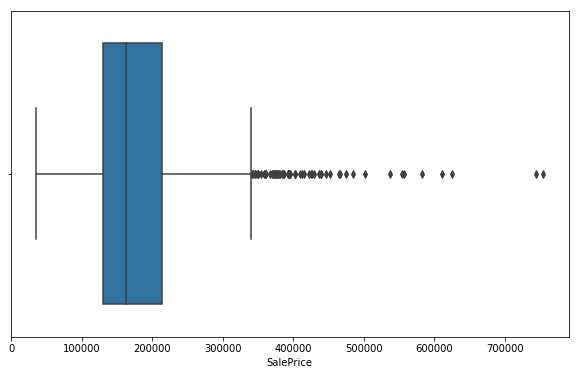

In [1084]:
plt.figure(figsize=(10,6))
sns.boxplot(housing_final.SalePrice)

It can be seen that there are some outliers. Dropping the rows having Saleprice more than 330000

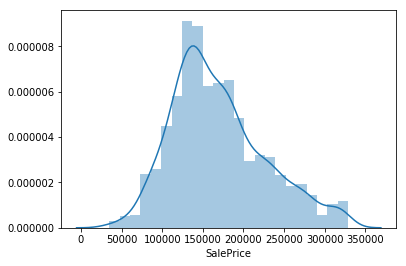

In [1085]:
#dist plot after filtering
sns.distplot(housing_final[housing_final.SalePrice<330000].SalePrice)

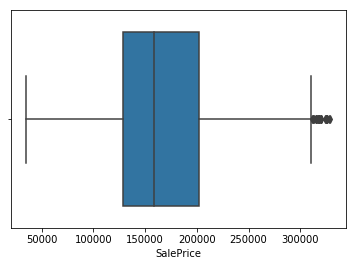

In [1086]:
#boxplot after filtering
sns.boxplot(housing_final[housing_final.SalePrice<330000].SalePrice)

In [1087]:
#final dataset after filtering
housing_final=housing_final[housing_final.SalePrice<300000]

### Train Test Split

In [1088]:
#train test split
df_train,df_test = train_test_split(housing_final,train_size=0.7,test_size=0.3,random_state=100)


### Scaling the data

In [1089]:
#scale and fit transform on training data
scaler=StandardScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [1090]:
#transforming the test data 
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1091]:
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
879,-0.877802,-0.340878,-0.713835,2.136094,0.031724,0.556912,-0.29317,-0.787639,-0.343306,-0.706697,...,0,0,0,0,1,0,0,0,1,0
1139,-0.655337,-0.141198,-0.713835,-0.536864,-0.544704,0.554589,-0.29317,-0.664516,-0.219402,0.146689,...,0,0,0,0,1,0,0,0,1,0
576,-0.210408,-0.422549,0.936579,1.245108,-0.544704,-0.943731,-0.29317,0.734821,-0.350594,-0.670083,...,0,0,0,0,1,0,0,0,1,0
170,-0.210408,0.277194,-0.713835,0.354122,-0.544704,-0.107459,-0.29317,-0.451419,-0.693151,-0.734862,...,0,0,0,0,1,0,0,0,1,0
1117,-0.877802,-0.022037,-0.713835,1.245108,-0.544704,0.686999,-0.29317,-0.849200,-0.270421,-0.622204,...,0,0,0,0,1,0,0,0,1,0


In [1092]:
df_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
14,-0.877802,0.111314,0.111372,-0.536864,0.813105,0.759011,-0.293170,-0.072580,0.601763,0.388905,...,0,0,0,0,1,0,0,0,1,0
772,0.456986,-0.246402,0.111372,-0.536864,-0.544704,0.036565,0.476173,-0.167290,0.057559,0.005866,...,0,0,0,0,1,0,0,0,0,0
355,-0.877802,0.149265,0.111372,-0.536864,-0.544704,-0.167857,3.002282,-0.541393,0.473000,0.239632,...,0,0,0,0,1,0,0,0,1,0
1171,-0.877802,-0.096325,0.111372,0.354122,-0.544704,0.594080,-0.293170,0.114472,0.621199,0.411436,...,0,0,0,0,1,0,0,0,1,0
311,-0.877802,-0.225523,0.111372,0.354122,-0.544704,0.635893,-0.293170,-0.612426,-0.080922,-0.402520,...,0,0,0,0,1,0,0,0,1,0


#### Seperate Target Variable and Predictor Variable

In [1093]:
y_train=df_train.pop('SalePrice')
X_train=df_train

In [1094]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1095]:
len(X_train.columns)

240

# Model Building

In [1096]:
# Running RFE with the output number of the variable equal to 60
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,60)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=60, step=1, verbose=0)

In [1097]:
#check ranking after RFE
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
239,SaleCondition_Partial,True,1
217,GarageQual_No Garage,True,1
35,MSZoning_FV,True,1
37,MSZoning_RL,True,1
216,GarageQual_Gd,True,1
215,GarageQual_Fa,True,1
212,GarageFinish_No Garage,True,1
211,GarageType_No Garage,True,1
89,Condition2_RRAe,True,1
46,Utilities_NoSeWa,True,1


In [1098]:
#columns selected through rfe
col= X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RL', 'Utilities_NoSeWa', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Duplex',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'Foundation_Wood', 'BsmtQual_No Basement', 'BsmtCond_No Basement',
       'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement', 'Heating_OthW',
       'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Min1', 'Functional_Min2', 'Functional_Typ',
       'GarageType_No 

In [1099]:
#columns not selected through rfe
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=180)

In [1100]:
#select the columns that are shortlisted through rfe for further analysis
X_train = X_train[col]
X_test = X_test[col]

# Ridge

In [1101]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [1102]:
#ridge object
ridge = Ridge()

In [1103]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1104]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.7}


In [1105]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 0.7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.3493804   0.04083403  0.0315236  -0.02702825  0.02761575  0.17170595
  0.10130753 -0.02902864  0.21407952  0.49523879  0.42286363 -0.51675719
  0.36527702  0.37667401 -0.28158511  0.         -2.7000549  -0.09040456
 -0.29300947  0.30954184  1.5620862   1.33252229  0.895879    0.
  1.41624242  1.32189949  0.75765515 -0.31708879 -0.16289345 -0.16289345
  0.         -0.07848497 -0.01939056 -0.01939056  0.          0.27937104
 -0.01939056 -0.01939056 -0.01939056 -0.55316281  0.         -0.5749645
 -0.08546299 -0.45117011  0.20080545  0.15427361  0.3481468  -0.0491082
 -0.0491082  -0.1787754   0.2588206  -0.0491082  -0.2784619  -0.04124751
 -0.09594676  0.07428654 -0.0491082  -0.27674903  0.05874504  0.08016591]


In [1106]:
# Lets calculate some metrics such as R2 score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [1107]:
#ridge r2 scores
r2_train_ridge = r2_score(y_train, y_pred_train)
print('Ridge R2 score for training',r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('Ridge R2 score for test',r2_test_ridge)

Ridge R2 score for training 0.7915234915755248
Ridge R2 score for test 0.8073581395983507


In [1108]:
#create datafram having coefficient for each column
betas_Ridge = pd.DataFrame(index=X_train.columns)
betas_Ridge['Coef']=ridge.coef_

In [1109]:
# top 10 Features having highest Coefficient
betas_Ridge.sort_values(by='Coef',ascending=False).head(10)

,Coef
RoofMatl_CompShg,1.562086
RoofMatl_Tar&Grv,1.416242
RoofMatl_Membran,1.332522
RoofMatl_WdShake,1.321899
RoofMatl_Metal,0.895879
RoofMatl_WdShngl,0.757655
MSZoning_FV,0.495239
MSZoning_RL,0.422864
Neighborhood_Crawfor,0.376674
LandSlope_Sev,0.365277


In [1110]:
betas_Ridge.sort_values(by='Coef',ascending=False).head(10).index

Index(['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_Membran',
       'RoofMatl_WdShake', 'RoofMatl_Metal', 'RoofMatl_WdShngl', 'MSZoning_FV',
       'MSZoning_RL', 'Neighborhood_Crawfor', 'LandSlope_Sev'],
      dtype='object')

# Lasso

In [1111]:
#lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1112]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [1113]:
#lasso using best alpha value
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
print(lasso.coef_)
#predict the data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

#check r2 scores
r2_train_lasso=r2_score(y_true=y_train,y_pred=y_train_pred)
print('Lasso R2 score for training',r2_train_lasso)
r2_test_lasso=r2_score(y_true=y_test,y_pred=y_test_pred)
print('Lasso R2 score for test',r2_test_lasso)

[ 3.57683206e-01  6.99913845e-02  4.09957163e-02 -0.00000000e+00
  1.33840503e-02  7.09197086e-02  0.00000000e+00 -4.07914350e-02
  3.31744466e-01  4.71475361e-01  4.22211829e-01 -0.00000000e+00
  3.34077819e-01  3.39267996e-01 -1.70479295e-01  0.00000000e+00
 -3.60636783e+00  0.00000000e+00 -2.85161020e-01  0.00000000e+00
  1.12351009e+00  8.04593102e-01  1.57397259e-01  0.00000000e+00
  1.02780332e+00  9.70738334e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -5.09952731e-02 -2.37005414e-17  0.00000000e+00  2.91736483e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.93121402e-01
  0.00000000e+00 -4.80812869e-01 -5.12828295e-03 -3.68432346e-01
  6.60593172e-02  2.58141730e-02  2.50939841e-01 -2.49769022e-02
 -2.15426533e-16 -1.00471126e-01  2.33778637e-01 -3.70855399e-03
 -0.00000000e+00  1.93942739e-02 -0.00000000e+00  3.90415765e-02
 -1.53061302e-02 -5.54716288e-02  1.49290639e-01  7.63681826e-02]
Lasso R2 score for train

In [1114]:
#create datafram having coefficient for each feature
betas_Lasso = pd.DataFrame(index=X_train.columns)

In [1115]:
betas_Lasso['Lasso'] = lasso.coef_

In [1116]:
#top 10 features having highest coefficient
betas_Lasso.sort_values(by='Lasso',ascending=False).head(10)

,Lasso
RoofMatl_CompShg,1.123510
RoofMatl_Tar&Grv,1.027803
RoofMatl_WdShake,0.970738
RoofMatl_Membran,0.804593
MSZoning_FV,0.471475
MSZoning_RL,0.422212
OverallQual,0.357683
Neighborhood_Crawfor,0.339268
LandSlope_Sev,0.334078
GrLivArea,0.331744


In [1117]:
betas_Lasso.sort_values(by='Lasso',ascending=False).head(10).index

Index(['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_Membran', 'MSZoning_FV', 'MSZoning_RL', 'OverallQual',
       'Neighborhood_Crawfor', 'LandSlope_Sev', 'GrLivArea'],
      dtype='object')

From the above the can observe that the best value for alpha for Ridge is 0.7

From the above the can observe that the best value for alpha for Lasso is 0.001

Ridge R2 score for training 0.7915234915755248

Ridge R2 score for test 0.8073581395983507

Lasso R2 score for training 0.7848958309842424

Lasso R2 score for test 0.8059225165687189

The R2 score is almost similar for both test and train data for both Ridge and Lasso.

The top 10 features for Ridge are : 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_Membran',
       'RoofMatl_WdShake', 'RoofMatl_Metal', 'RoofMatl_WdShngl', 'MSZoning_FV',
       'MSZoning_RL', 'Neighborhood_Crawfor', 'LandSlope_Sev'
       

The top 10 features for Lasso are : RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_Membran', 'MSZoning_FV', 'MSZoning_RL', 'OverallQual',
       'Neighborhood_Crawfor', 'LandSlope_Sev', 'GrLivArea'






## theorictal Question codes

#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 1.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

#Lets calculate some metrics such as R2 score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

#ridge r2 scores
r2_train_ridge = r2_score(y_train, y_pred_train)
print('Ridge R2 score for training',r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('Ridge R2 score for test',r2_test_ridge)

#create datafram having coefficient for each column
betas_Ridge = pd.DataFrame(index=X_train.columns)
betas_Ridge['Coef']=ridge.coef_

#top 10 Features having highest Coefficient
print(betas_Ridge.sort_values(by='Coef',ascending=False).head(10))

#lasso using 2 times  best alpha value
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)
print(lasso.coef_)
#predict the data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

#check r2 scores
r2_train_lasso=r2_score(y_true=y_train,y_pred=y_train_pred)
print('Lasso R2 score for training',r2_train_lasso)
r2_test_lasso=r2_score(y_true=y_test,y_pred=y_test_pred)
print('Lasso R2 score for test',r2_test_lasso)

#create datafram having coefficient for each feature
betas_Lasso = pd.DataFrame(index=X_train.columns)
betas_Lasso['Lasso'] = lasso.coef_
#top 10 features having highest coefficient
betas_Lasso.sort_values(by='Lasso',ascending=False).head(10)

#Q3 

X_train_lasso= X_train.drop(['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_Membran', 'MSZoning_FV'],axis=1)
X_test_lasso= X_test.drop(['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_Membran', 'MSZoning_FV'],axis=1)

#lasso regression
lasso = Lasso()

#cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 

#Checking the best parameter(Alpha value)
model_cv.best_params_

lasso = Lasso(alpha=0.002)
lasso.fit(X_train_lasso,y_train)
print(lasso.coef_)
#predict the data
y_train_pred = lasso.predict(X_train_lasso)
y_test_pred = lasso.predict(X_test_lasso)

#check r2 scores
r2_train_lasso=r2_score(y_true=y_train,y_pred=y_train_pred)
print('Lasso R2 score for training',r2_train_lasso)
r2_test_lasso=r2_score(y_true=y_test,y_pred=y_test_pred)
print('Lasso R2 score for test',r2_test_lasso)

#create datafram having coefficient for each feature
betas_Lasso1 = pd.DataFrame(index=X_train_lasso.columns)
betas_Lasso1['Lasso'] = lasso.coef_
#top 10 features having highest coefficient
betas_Lasso1.sort_values(by='Lasso',ascending=False).head(10)

betas_Lasso1.sort_values(by='Lasso',ascending=False).head(10).index